## about the notebook
* This notebook is the part 2 of Task1 notebook. 
#### Tasks done:
1.  we will clean the data and remove outliers
2. copy the data and rename the copied data as 'cleaned_data_v4' in a folder 'cleaned data' in 'data ' folder.
3. create new '.py' file in scripts with class completelly dedicated in cleaning the data. The name of the module is 'the_janitor'. This function will resolve:
* missing values and replace them with mean value if numerical and mode value if the column is categorical column.
* outliers are converted into mean value.
* null cells are manipulated.


### In this notebook:
1. clean the data 
2. do the EDA again, this could help us to understand how unclean and ouitlier infected the original data was and we will see if the new data ccould help us make better decisions both for the thing to be done in the company and model training.

In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))
import pandas as pd

In [2]:
from scripts.the_janitor import DataCleaner

/home/nahomnadew/Desktop/10x/AlphhaCare_Insurance-v2/AlphaCare_Insurance_solutions/scripts/the_janitor.py:54: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/home/nahomnadew/Desktop/10x/AlphhaCare_Insurance-v2/AlphaCare_Insurance_solutions/Data/MachineLearningRating_v3.csv')


Missing values before cleaning:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        

/home/nahomnadew/Desktop/10x/AlphhaCare_Insurance-v2/env2/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Missing values after cleaning:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                         

/home/nahomnadew/Desktop/10x/AlphhaCare_Insurance-v2/AlphaCare_Insurance_solutions/scripts/the_janitor.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-70927.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df.loc[self.df[column] < lower_bound, column] = lower_bound


now, handled all the missing values, we can proceed to the next part. Detecting and handling outliers.This method detects outliers in the TotalPremium column using the Interquartile Range (IQR) method. It then handles the outliers by capping them to the lower and upper bounds defined by the IQR.

In [3]:
data = pd.read_csv('/home/nahomnadew/Desktop/10x/AlphhaCare_Insurance-v2/AlphaCare_Insurance_solutions/Data/MachineLearningRating_v3.1.csv')
data = DataCleaner(data)

/tmp/ipykernel_26327/3138407121.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/home/nahomnadew/Desktop/10x/AlphhaCare_Insurance-v2/AlphaCare_Insurance_solutions/Data/MachineLearningRating_v3.1.csv')


In [4]:
data.detect_and_handle_outliers()

Outliers detected in column UnderwrittenCoverID: 0


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249.0,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249.0,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249.0,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255.0,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255.0,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520.0,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520.0,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520.0,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519.0,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


due to the fact that the codes are run frequent times, if the data is once cleaned in earlier runs, recent runs will return 0 detected outliers. In this outlier session, the outlier detected first was more that 200, 000 entry, but now after the cleaning, the code returns 0 detected values
### data cleaning completed. 
what are the next steps?
* the EDA class will be imported
* the data will be analysed again

In [5]:
from scripts.task1 import Eda

In [6]:
file = Eda('C:\\Users\\nadew\\10x\\week3\\ACIS\\data\\cleaned_data\\cleaned_data_v4.csv')

Loading data from C:\Users\nadew\10x\week3\ACIS\data\cleaned_data\cleaned_data_v4.csv
Error loading data: [Errno 2] No such file or directory: 'C:\\Users\\nadew\\10x\\week3\\ACIS\\data\\cleaned_data\\cleaned_data_v4.csv'


In [7]:
file.inspect_data()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame
None

Missing Values:
Series([], dtype: float64)

First Few Rows:
Empty DataFrame
Columns: []
Index: []


#### correlation table understanding
#### Strong Correlations:

UnderwrittenCoverID and PolicyID have a strong positive correlation of 0.92, indicating they are closely related.
cubicCapacity and kilowatts have a strong positive correlation of 1.00, suggesting they are highly correlated.
NumberOfDoors and CustomValueEstimate have a strong positive correlation of 1.00, implying a strong relationship between these features.

#### Moderate Correlations:

RegistrationYear and Cylinders have a moderate positive correlation of 0.30, suggesting a moderate relationship between these features.
kilowatts and cubicCapacity have a moderate positive correlation of 0.57, indicating a moderately strong relationship.
NumberOfVehiclesInFleet and SumInsured have a moderate negative correlation of -0.30, suggesting an inverse relationship between these features.

#### Weak or No Correlations:

Most of the other features have weak or no correlations, with absolute values less than 0.20, indicating little to no linear relationship between them.
Diagonal Elements:

The diagonal elements of the matrix, where the feature names are the same, all have a value of 1.0, which is expected as a feature is perfectly correlated with itself.

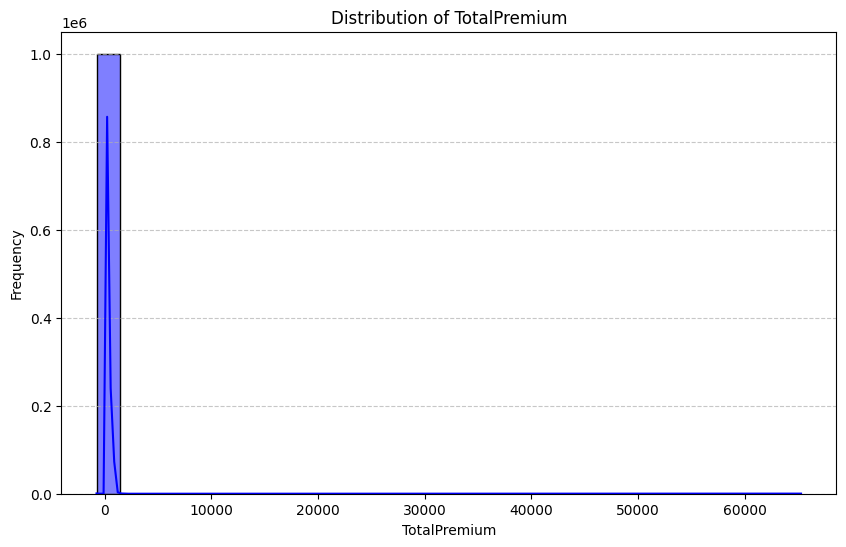

In [ ]:
columns_req = ['TotalPremium']
file.visualize_distribution(columns_req)

In [11]:
columns_req = ['TotalClaims']
file.visualize_distribution(columns_req)

Column TotalClaims not found in the dataset.


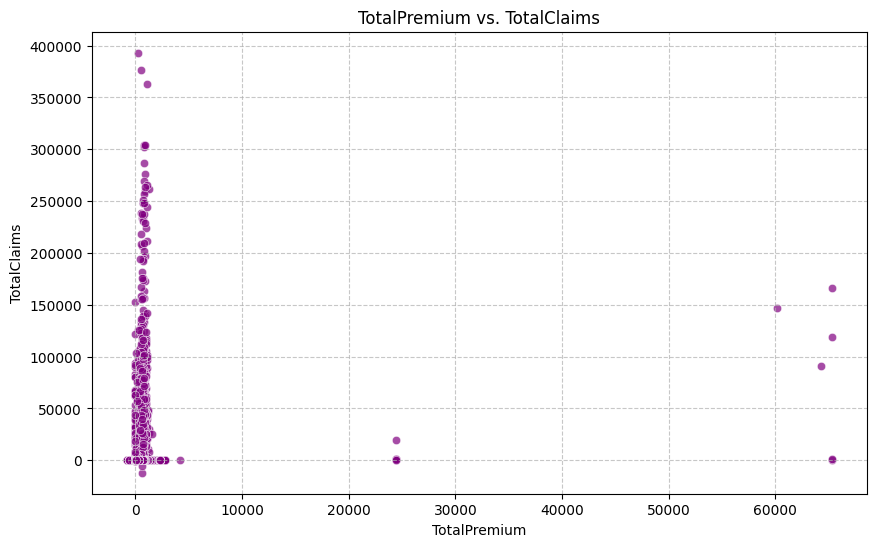

In [ ]:
file.visualize_relationship('TotalPremium', 'TotalClaims')

In [12]:
file.generate_report()


Key Insights:
Total rows: 0
Columns: []


## conclusion
we have cleaned the data and we have seen no significant difference on the graphs plotted. Given this as a reason, the observations and recommendations made in task1.ipynb will remain unchanged.
* incase you want to navigate to task1.ipynb, use the this link: https://github.com/chapi1420/AlphaCare_Insurance_solutions/blob/master/notebooks/task1.ipynb

the end